In [1]:
%matplotlib inline
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']
tokenizer = info.features['text'].encoder

W0814 20:04:29.697090 11624 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
EMBEDDING_DIM = 64
NUM_EPOCH = 10

In [4]:
train_dataset = train_data.shuffle(BUFFER_SIZE)\
    .padded_batch(BATCH_SIZE, train_data.output_shapes)
test_dataset = test_data.padded_batch(BATCH_SIZE, test_data.output_shapes)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalAveragePooling1D, Dense

model = Sequential([
    Embedding(tokenizer.vocab_size, EMBEDDING_DIM),
    Conv1D(128, 5, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import Callback

class Logger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("epoch: {} - {}".format(epoch + 1, logs))

In [8]:
history = model.fit(train_dataset, epochs=NUM_EPOCH, validation_data=(test_dataset), callbacks=[Logger()], verbose=0)

W0814 20:04:31.097046 11624 deprecation.py:323] From d:\Dev\Miniconda3\envs\tf2\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


epoch: 1 - {'loss': 0.4606696817111969, 'accuracy': 0.77296, 'val_loss': 0.3158701496660862, 'val_accuracy': 0.87492}
epoch: 2 - {'loss': 0.2256221717262268, 'accuracy': 0.91616, 'val_loss': 0.30064342561585217, 'val_accuracy': 0.87928}
epoch: 3 - {'loss': 0.17015578137397766, 'accuracy': 0.9388, 'val_loss': 0.33085896303434204, 'val_accuracy': 0.87328}
epoch: 4 - {'loss': 0.1383763881587982, 'accuracy': 0.95096, 'val_loss': 0.37495586958230304, 'val_accuracy': 0.87056}
epoch: 5 - {'loss': 0.11176969394683837, 'accuracy': 0.96196, 'val_loss': 0.4120678319155103, 'val_accuracy': 0.86492}
epoch: 6 - {'loss': 0.09168408722877502, 'accuracy': 0.96992, 'val_loss': 0.4681287232567282, 'val_accuracy': 0.85776}
epoch: 7 - {'loss': 0.07346229475021362, 'accuracy': 0.9746, 'val_loss': 0.5674192090244854, 'val_accuracy': 0.858}
epoch: 8 - {'loss': 0.05977537671923638, 'accuracy': 0.9802, 'val_loss': 0.6091420314729671, 'val_accuracy': 0.85296}
epoch: 9 - {'loss': 0.04412881904810667, 'accuracy': 

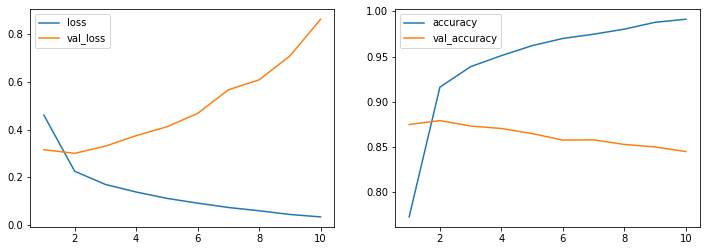

In [9]:
from util import plot_history

plot_history(history)